<a href="https://colab.research.google.com/github/YahiaAbdeldjalilBenyahia/graph-coloring/blob/main/heuristic/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation des heuristiques pour le probleme de coloration de graphe**

## **Fonctions Utilitaires**

In [ ]:
import time
import numpy as np
import requests
import random
import matplotlib.pyplot as plt

In [ ]:
#fonction recuperation du graphe du website DMACS (made by samia et assala)
def lire_graphe_triangulaire(url_fichier,is_url):
    """
    Lit un fichier DIMACS et convertit le graphe en une matrice triangulaire inférieure.

    :param url_fichier: URL du fichier .col contenant le graphe
    :return: Matrice triangulaire inférieure sous forme de liste de listes
    """
    lignes = []
    if(is_url):
      response = requests.get(url_fichier)
      text = response.text
      lignes = text.split('\n')
    else:
      with open(url_fichier, 'r') as f:
        lignes = f.readlines()

    nb_sommets = 0
    aretes = []

    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('p'):
            _, _, nb_sommets, _ = ligne.split()
            nb_sommets = int(nb_sommets)
        elif ligne.startswith('e'):
            _, sommet1, sommet2 = ligne.split()
            sommet1, sommet2 = int(sommet1), int(sommet2)
            aretes.append((sommet1, sommet2))

    # Création de la matrice triangulaire inférieure
    matrice_triangulaire = [[0] * (i + 1) for i in range(nb_sommets)]
    for sommet1, sommet2 in aretes:
        sommet1 -= 1  # Ajustement des indices (DIMACS commence à 1)
        sommet2 -= 1
        if sommet1 > sommet2:
            matrice_triangulaire[sommet1][sommet2] = 1
        else:
            matrice_triangulaire[sommet2][sommet1] = 1

    return matrice_triangulaire, nb_sommets

In [ ]:
#fonction recuperation du graphe du website DMACS (made by samia et assala)
def lire_graphe_full(url_fichier,is_url):
    """
    Lit un fichier DIMACS et convertit le graphe en une matrice triangulaire inférieure.

    :param url_fichier: URL du fichier .col contenant le graphe
    :return: Matrice triangulaire inférieure sous forme de liste de listes
    """
    lignes = []
    if(is_url):
      response = requests.get(url_fichier)
      text = response.text
      lignes = text.split('\n')
    else:
      with open(url_fichier, 'r') as f:
        lignes = f.readlines()

    nb_sommets = 0
    aretes = []

    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('p'):
            _, _, nb_sommets, _ = ligne.split()
            nb_sommets = int(nb_sommets)
        elif ligne.startswith('e'):
            _, sommet1, sommet2 = ligne.split()
            sommet1, sommet2 = int(sommet1), int(sommet2)
            aretes.append((sommet1, sommet2))

    # Création de la matrice triangulaire inférieure
    matrice_full = [[0] * (nb_sommets) for i in range(nb_sommets)]
    for sommet1, sommet2 in aretes:
        sommet1 -= 1  # Ajustement des indices (DIMACS commence à 1)
        sommet2 -= 1
        matrice_full[sommet1][sommet2] = 1
        matrice_full[sommet2][sommet1] = 1

    return matrice_full, nb_sommets

In [ ]:
def get_neighbors(node, matrice_triangulaire,n):
        """
        Retourne l'ensemble des voisins du nœud 'node' en utilisant la matrice triangulaire.
        Pour un nœud i, les voisins sont ceux :
          - Dans la même ligne pour les indices j < i (si matrice[i][j] == 1)
          - Dans les lignes suivantes pour lesquels le nœud i apparaît (si matrice[k][i] == 1 pour k > i)
        """
        neighbors = set()
        # Pour les indices j < node, vérifier la ligne 'node'
        for j in range(node):
            if matrice_triangulaire[node][j] == 1:
                neighbors.add(j)
        # Pour les indices > node, le nœud 'node' se trouve en colonne dans la ligne k
        for k in range(node + 1, n):
            if matrice_triangulaire[k][node] == 1:
                neighbors.add(k)
        return neighbors

## **Heuristiques pures**

> 4, par construction : Welsh et Powell, DSatur, RLF et Incidence Degree Ordering



### Welsh et Powell

In [ ]:
def welsh_powell(matrice_triangulaire):
    """
    Applique l'algorithme de Welsh-Powell sur une matrice triangulaire inférieure.

    :param matrice_triangulaire: Matrice triangulaire inférieure représentant le graphe.
    :return: (Nombre chromatique, Liste des couleurs attribuées à chaque sommet, Temps d'exécution)
    """
    start_time = time.time()  # Début du calcul du temps

    n = len(matrice_triangulaire)
    sommets = list(range(n))

    # Calculer les degrés des sommets
    degres = [len(get_neighbors(i, matrice_triangulaire, n)) for i in range(n)]

    # Trier les sommets par degré décroissant
    sommets.sort(key=lambda x: degres[x], reverse=True)

    couleur_attribuee = [-1] * n  # -1 signifie non colorié

    for sommet in sommets:
        if couleur_attribuee[sommet] == -1:  # Si le sommet n'est pas colorié
            # Trouver les couleurs utilisées par les voisins
            couleurs_voisins = set()
            for voisin in get_neighbors(sommet, matrice_triangulaire, n):
                if couleur_attribuee[voisin] != -1:
                    couleurs_voisins.add(couleur_attribuee[voisin])

            # Trouver la plus petite couleur disponible
            couleur_disponible = 0
            while couleur_disponible in couleurs_voisins:
                couleur_disponible += 1

            # Attribuer la couleur disponible
            couleur_attribuee[sommet] = couleur_disponible

    nombre_chromatique = max(couleur_attribuee) + 1

    end_time = time.time()  # Fin du calcul du temps
    execution_time = end_time - start_time  # Temps d'exécution en secondes

    return nombre_chromatique, couleur_attribuee, execution_time

### DSATUR

In [ ]:
def dsatur(matrice_triangulaire):
  start = time.time()
  n = len(matrice_triangulaire)
  voisins = {i: get_neighbors(i, matrice_triangulaire,n) for i in range (n)}
  coloring = [None]*n # affectation initial
  ensemble_saturation = [set() for _ in range(n)] #initialisation des ensembles de saturation de chaque noeud
  degre = [len(voisins[i]) for i in range(n)] # Use a list, not a set
  # tantque on n'a pas fini de colorier otus les noeuds
  while any(color is None for color in coloring): # Loop until all nodes are colored
    non_colories = [i for i in range(n) if coloring[i] is None]
    if not non_colories:
          break
    chosen = max(non_colories, key=lambda x: (len(ensemble_saturation[x]), degre[x]))
    used_colors = {coloring[v] for v in voisins[chosen] if coloring[v] is not None}
    color = 0
    while color in used_colors:
      color += 1
    coloring[chosen] = color
    for v in voisins[chosen]:
        if coloring[v] is None:
            ensemble_saturation[v].add(color)
  chromatic_number = max(coloring) + 1 if coloring else 0
  temps = time.time() - start
  return chromatic_number, coloring, temps

### RLF (Recursive Largest First)

In [ ]:
from collections import deque
import time

def rlf(matrice_triangulaire, n):
    """
    Implémente l'heuristique RLF (Recursive Largest First) pour le coloriage de graphes.

    Args:
        matrice_triangulaire: Matrice de représentation triangulaire du graphe.
        n: Nombre de nœuds.

    Returns:
        (nombre_chromatique, coloration, temps_execution)
    """
    start_time = time.time()

    # Précalcul de la liste d'adjacence pour optimiser les accès
    adj = [get_neighbors(u, matrice_triangulaire, n) for u in range(n)]

    coloring = [None] * n
    current_color = 0
    uncolored = set(range(n))

    while uncolored:
        color_class = []
        available = list(uncolored)
        available_set = set(available)

        while available:
            # Calcul des degrés dans le sous-graphe courant
            degrees = {}
            for u in available:
                count = 0
                for v in adj[u]:
                    if v in available_set:
                        count += 1
                degrees[u] = count

            # Sélection du nœud avec le degré maximal
            max_degree = max(degrees.values())
            candidates = [u for u in available if degrees[u] == max_degree]
            chosen = min(candidates)  # Désambiguïsation par indice

            color_class.append(chosen)

            # Suppression du nœud choisi et de ses voisins
            to_remove = {chosen}
            to_remove.update(adj[chosen])

            available = [u for u in available if u not in to_remove]
            available_set = set(available)

        # Attribution de la couleur
        for u in color_class:
            coloring[u] = current_color
        uncolored -= set(color_class)
        current_color += 1

    temps_execution = time.time() - start_time
    return current_color, coloring, temps_execution

### Incidence Degree Ordering

In [ ]:
def incidence_degree_ordering(matrice_triangulaire):
        """
        Incidence Degree Ordering (IDO) Graph Coloring Heuristic.

        Args:
            adj_matrix: Adjacency matrix of the undirected graph.
            N: Number of nodes in the graph.

        Returns:
            The number of colors used in the coloring.
        """
        # Calculate incidence degrees (number of differently colored neighbors)
        start = time.time()
        N = len(matrice_triangulaire)
        incidence_degrees = np.zeros(N, dtype=int)
        colors = [-1] * N
        for _ in range(N):  # Iterate N times to color all nodes
            # Find the node with the maximum incidence degree among uncolored nodes
            max_incidence_node = -1
            max_incidence_degree = -1
            for node in range(N):
                if colors[node] == -1 and incidence_degrees[node] > max_incidence_degree:
                    max_incidence_degree = incidence_degrees[node]
                    max_incidence_node = node

            if max_incidence_node != -1: # if we found a node to color
                available_colors = set(range(1, N + 1))
                for neighbor in range(0, max_incidence_node):
                    if matrice_triangulaire[max_incidence_node][neighbor] == 1 and colors[neighbor] != -1:
                        available_colors.discard(colors[neighbor])

                if available_colors:
                    colors[max_incidence_node] = min(available_colors)
                else:
                    max_used_color = max(colors) if any(colors) else 0
                    colors[max_incidence_node] = max_used_color + 1

                # Update incidence degrees of uncolored neighbors
                for neighbor in range(0, max_incidence_node):
                    if matrice_triangulaire[max_incidence_node][neighbor] == 1 and colors[neighbor] == -1:
                        neighbor_colors = set()
                        for nn in range(0, neighbor):
                            if matrice_triangulaire[neighbor][nn] == 1 and colors[nn] != -1:
                                neighbor_colors.add(colors[nn])
                        incidence_degrees[neighbor] = len(neighbor_colors)

        return len(set(colors)), colors, time.time() - start

## **Tester les 4 heuristiques par construction sur les benchmarks de DMACS**

In [ ]:
# getting the graph from the website
graphs_best = {
  "dsjc125.9":"44",
  "dsjc125.1":"5",
  "dsjc250.1":"8",
  "dsjc250.9":"72",
  "r250.5":"66/65",
  "r250.1":"8",
  "dsjc250.5":"28/?",
  "flat300_28_0":"28/28",
  "le450_25c":"25/25"
}
for graph, best in graphs_best.items():
  matx, n = lire_graphe_triangulaire(f"https://cedric.cnam.fr/~porumbed/graphs/{graph}.col",1)
  print("\n\nGraph: ", graph, " Best: ", best)
  print("Dsature:")
  #chromatic_number, coloring, temps = dsatur(matx)
  #print("Nombre chromatique :", chromatic_number, "Time : ", temps)

  print("welsh_powell:")
  chromatic_number, coloring, temps = welsh_powell(matx)
  print("Nombre chromatique :", chromatic_number, "Time : ", temps)

  print("incidence degree ordering:")
  chromatic_number, coloring, temps = incidence_degree_ordering(matx)
  print("Nombre chromatique :", chromatic_number, "Time : ", temps)


  print("Recursive Largest First")
  chromatic_number, coloring, temps = rlf(matx,n)
  print("Nombre chromatique :", chromatic_number, "Time : ", temps)



Graph:  dsjc125.9  Best:  44
Dsature:
welsh_powell:
Nombre chromatique : 53 Time :  0.011011600494384766
incidence degree ordering:
Nombre chromatique : 56 Time :  0.0064678192138671875
Recursive Largest First
Nombre chromatique : 60 Time :  0.05315709114074707


Graph:  dsjc125.1  Best:  5
Dsature:
welsh_powell:
Nombre chromatique : 7 Time :  0.008095502853393555
incidence degree ordering:
Nombre chromatique : 8 Time :  0.005797147750854492
Recursive Largest First
Nombre chromatique : 9 Time :  0.0068509578704833984


Graph:  dsjc250.1  Best:  8
Dsature:
welsh_powell:
Nombre chromatique : 11 Time :  0.012759208679199219
incidence degree ordering:
Nombre chromatique : 13 Time :  0.021586179733276367
Recursive Largest First
Nombre chromatique : 13 Time :  0.03424978256225586


Graph:  dsjc250.9  Best:  72
Dsature:
welsh_powell:
Nombre chromatique : 93 Time :  0.013735771179199219
incidence degree ordering:
Nombre chromatique : 99 Time :  0.013439178466796875
Recursive Largest First
No

### Resources
https://www.geeksforgeeks.org/dsatur-algorithm-for-graph-coloring/

## **Branch and Bound**

In [ ]:
def greedy_coloring(matrice_triangulaire):
    """
    Applique un algorithme glouton pour obtenir une solution initiale de coloration.
    Cette solution sert de borne supérieure initiale (upper bound) pour le branch and bound.

    :param matrice_triangulaire: La matrice triangulaire inférieure représentant le graphe.
    :return: Tuple (nombre de couleurs utilisées, liste de coloration)
    """
    n = len(matrice_triangulaire)
    colors = [None] * n
    for vertex in range(n):
        forbidden = set()
        for j in range(n):
            if colors[j] is not None:
                if vertex > j and matrice_triangulaire[vertex][j] == 1:
                    forbidden.add(colors[j])
                elif vertex < j and matrice_triangulaire[j][vertex] == 1:
                    forbidden.add(colors[j])
        color = 1
        while color in forbidden:
            color += 1
        colors[vertex] = color
    return len(set(colors)), colors

In [ ]:
def build_neighbor_list(matrice_triangulaire):
    """
    Pré-calcule la liste des voisins pour chaque sommet à partir de la matrice triangulaire.

    :param matrice_triangulaire: Matrice triangulaire inférieure représentant le graphe.
    :return: Liste de listes, où chaque sous-liste contient les indices des voisins du sommet.
    """
    n = len(matrice_triangulaire)
    neighbors = [[] for _ in range(n)]
    for i in range(n):
        for j in range(i):
            if matrice_triangulaire[i][j] == 1:
                neighbors[i].append(j)
                neighbors[j].append(i)
    return neighbors

In [ ]:
def select_next_vertex_dsatur(assignment, uncolored, neighbors):
    """
    Sélectionne dynamiquement le prochain sommet à colorier selon la règle DSATUR.
    Le sommet choisi est celui qui a la plus grande "saturation" (nombre de couleurs distinctes parmi ses voisins coloriés)
    et, en cas d'égalité, celui avec le degré le plus élevé.

    :param assignment: Liste des couleurs assignées (None si non colorié)
    :param uncolored: Ensemble des indices de sommets non colorés
    :param neighbors: Liste pré-calculée des voisins pour chaque sommet
    :return: L'indice du sommet à colorier ensuite
    """
    best_vertex = None
    best_sat = -1
    best_degree = -1
    for v in uncolored:
        sat = len({assignment[u] for u in neighbors[v] if assignment[u] is not None})
        degree = len(neighbors[v])
        if sat > best_sat or (sat == best_sat and degree > best_degree):
            best_sat = sat
            best_degree = degree
            best_vertex = v
    return best_vertex

In [ ]:
def branch_and_bound_coloring_dsatur(matrice_triangulaire):
    """
    Implémente le branch and bound pour la coloration de graphe en utilisant DSATUR pour le choix du prochain sommet.

    Optimisations appliquées :
      - Utilisation d'une heuristique gloutonne pour obtenir une solution initiale (borne supérieure).
      - Pré-calcul des voisins pour accélérer la vérification des conflits.
      - Sélection dynamique du prochain sommet à colorier par DSATUR.
      - Branching sur les couleurs déjà utilisées + une nouvelle couleur.

    Chaque état est représenté par :
      - assignment : liste des couleurs assignées (None si non colorié)
      - uncolored : ensemble des indices des sommets non colorés
      - num_colors_used : nombre de couleurs utilisées jusqu'ici

    :return: Tuple (nombre chromatique optimal, solution de coloration, temps d'exécution)
    """
    start_time = time.time()
    n = len(matrice_triangulaire)

    # Obtenir une solution initiale par heuristique gloutonne
    initial_color_count, initial_solution = greedy_coloring(matrice_triangulaire)
    #print(f"Initial heuristic solution: {initial_solution} using {initial_color_count} colors.")

    best_color_count = initial_color_count
    best_solution = initial_solution.copy()

    # Pré-calculer la liste des voisins
    neighbors = build_neighbor_list(matrice_triangulaire)

    # État initial : aucun sommet colorié
    initial_assignment = [None] * n
    uncolored = set(range(n))
    initial_state = (initial_assignment, uncolored, 0)

    stack = [initial_state]
    nodes_processed = 0  # Compteur de noeuds explorés

    while stack:
        nodes_processed += 1
        assignment, uncolored, num_colors_used = stack.pop()

        # Affichage périodique de la progression
        #if nodes_processed % 1000 == 0:
            #print(f"Nodes processed: {nodes_processed}, Current best: {best_color_count}, Stack size: {len(stack)}")

        if num_colors_used >= best_color_count:
            continue

        # Si tous les sommets sont coloriés, mise à jour de la meilleure solution.
        if not uncolored:
            used_colors = len({color for color in assignment if color is not None})
            #print(f"Complete solution found with {used_colors} colors: {assignment}")
            if used_colors < best_color_count:
                best_color_count = used_colors
                best_solution = assignment.copy()
                #print(f"New best solution with {best_color_count} colors!")
            continue

        # Sélectionner le prochain sommet à colorier par DSATUR
        v = select_next_vertex_dsatur(assignment, uncolored, neighbors)
        forbidden = {assignment[u] for u in neighbors[v] if assignment[u] is not None}

        # Déterminer les couleurs disponibles: celles déjà utilisées non interdites et une nouvelle couleur.
        available_colors = [color for color in range(1, num_colors_used + 1) if color not in forbidden]
        available_colors.append(num_colors_used + 1)

        for color in available_colors:
            new_assignment = assignment.copy()
            new_assignment[v] = color
            new_num_colors_used = max(num_colors_used, color)

            # Pruning: Élagage des branches qui ne peuvent pas améliorer la solution.
            if new_num_colors_used >= best_color_count:
                #print(f"Elagage de la branche dans le noeud {v} avec la couleur {color} (utilise: {new_num_colors_used} >= meilleur: {best_color_count})")
                continue

            new_uncolored = uncolored.copy()
            new_uncolored.remove(v)
            stack.append((new_assignment, new_uncolored, new_num_colors_used))

    execution_time = time.time() - start_time
    #print(f"Nombre total des noeuds: {nodes_processed}")
    return best_color_count, best_solution, execution_time

## **Comparaison des heuristiques**
en terme du temps d'execution et performance (bar graph)

In [ ]:
# Draw bar graph for each test graph to compare vertices and edges
def plot_vertices_edges(graph_info):

    graphs = list(graph_info.keys())
    vertices = [graph_info[graph][0] for graph in graphs]
    edges = [graph_info[graph][1] for graph in graphs]

    x = np.arange(len(graphs))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))

    bars1 = ax.bar(x - width/2, vertices, width, label="Number of Vertices")
    bars2 = ax.bar(x + width/2, edges, width, label="Number of Edges")

    # Add numbers on top of bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, f"{int(height)}", ha="center", va="bottom", fontsize=10)

    ax.set_xlabel("Graph Test Files")
    ax.set_ylabel("Count")
    ax.set_title("Number of Vertices and Edges in Graphs")
    ax.set_xticks(x)
    ax.set_xticklabels(graphs, rotation=45, ha="right")
    ax.legend()

    plt.show()

In [ ]:
# Function to plot execution time comparisons
def plot_time_comparisons(data):
    graphs = list(data.keys())
    methods = ["Dsatur", "Welsh-Powell", "Incidence Degree Ordering", "Recursive Largest First"]

    x = np.arange(len(graphs))
    width = 0.2

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, method in enumerate(methods):
        values = [data[graph][i] for graph in graphs]
        bars = ax.bar(x + i * width, values, width, label=method)

    ax.set_xlabel("Graph Test Files")
    ax.set_ylabel("Execution Time (s)")
    ax.set_title("Execution Time Comparison")
    ax.set_xticks(x + width)
    ax.set_xticklabels(graphs, rotation=45, ha="right")
    ax.legend()

    plt.show()

In [ ]:
# Function to plot chromatic number comparisons
def plot_chromatic_comparisons(data):
    graphs = list(data.keys())
    methods = ["Dsatur", "Welsh-Powell", "Incidence Degree Ordering", "Recursive Largest First"]

    x = np.arange(len(graphs))
    width = 0.2

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, method in enumerate(methods):
        values = [data[graph][i] for graph in graphs]
        bars = ax.bar(x + i * width, values, width, label=method)

        # Add exact chromatic number on top of each bar
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}",
                    ha="center", va="bottom", fontsize=9)

    ax.set_xlabel("Graph Test Files")
    ax.set_ylabel("Chromatic Number")
    ax.set_title("Chromatic Number Comparison")
    ax.set_xticks(x + width)
    ax.set_xticklabels(graphs, rotation=45, ha="right")
    ax.legend()

    plt.show()

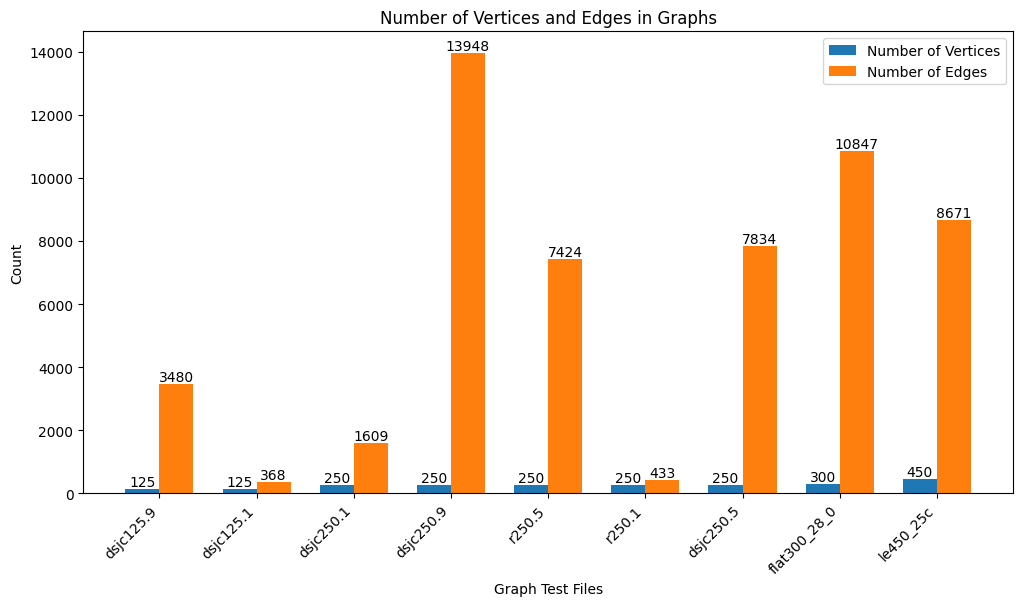

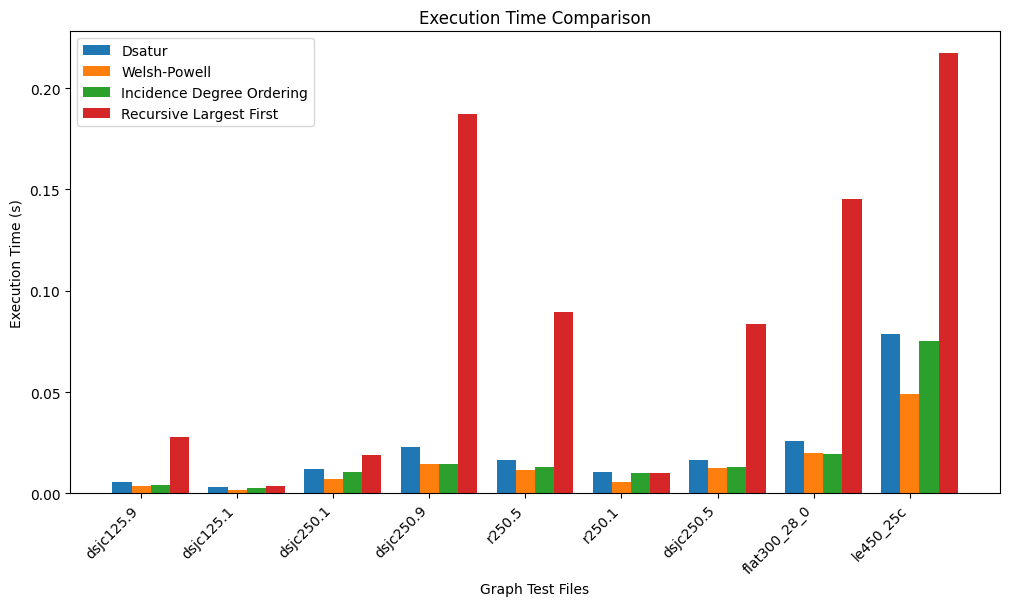

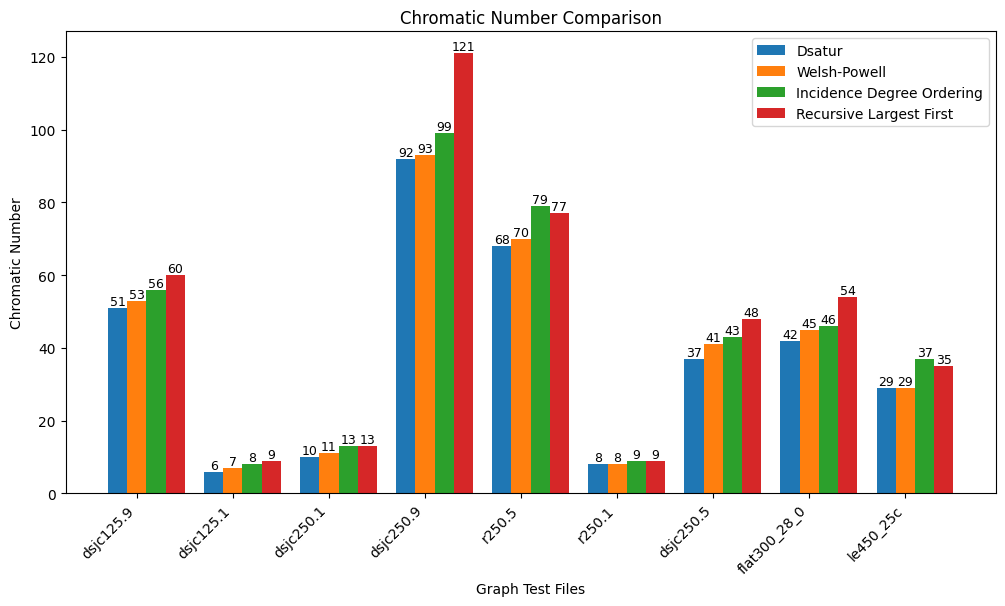

In [ ]:
graphs_best = {
    "dsjc125.9": "44",
    "dsjc125.1": "5",
    "dsjc250.1": "8",
    "dsjc250.9": "72",
    "r250.5": "66/65",
    "r250.1": "8",
    "dsjc250.5": "28/?",
    "flat300_28_0": "28/28",
    "le450_25c": "25/25"
}

graph_info = {}
results_time = {}
results_chromatic = {}

methods = {
    "Dsatur": dsatur,
    "Welsh-Powell": welsh_powell,
    "Incidence Degree Ordering": incidence_degree_ordering,
    "Recursive Largest First": rlf
}

for graph in graphs_best.keys():
    matx, n = lire_graphe_triangulaire(f"https://cedric.cnam.fr/~porumbed/graphs/{graph}.col",1)
    num_edges = sum(sum(row) for row in matx) // 2  # Count edges
    graph_info[graph] = (n, num_edges)

    results_time[graph] = []
    results_chromatic[graph] = []

    for name, method in methods.items():
        if name == "Recursive Largest First":
            chromatic_number, _, temps = method(matx, n)
        else:
            chromatic_number, _, temps = method(matx)

        results_time[graph].append(temps)
        results_chromatic[graph].append(chromatic_number)

# Plot results
plot_vertices_edges(graph_info)
plot_time_comparisons(results_time)
plot_chromatic_comparisons(results_chromatic)


## **Comparaison des heuristiques avec branch and bound**
en terme du temps d'execution et performance (bar graph)

***On a utilisé les graphes réduits du TP précédent***

In [ ]:
# Draw bar graph for each test graph to compare vertices and edges
def plot_vertices_edges(graph_info):

    graphs = list(graph_info.keys())
    vertices = [graph_info[graph][0] for graph in graphs]
    edges = [graph_info[graph][1] for graph in graphs]

    x = np.arange(len(graphs))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))

    bars1 = ax.bar(x - width/2, vertices, width, label="Number of Vertices")
    bars2 = ax.bar(x + width/2, edges, width, label="Number of Edges")

    # Add numbers on top of bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, f"{int(height)}", ha="center", va="bottom", fontsize=10)

    ax.set_xlabel("Graph Test Files")
    ax.set_ylabel("Count")
    ax.set_title("Number of Vertices and Edges in Graphs")
    ax.set_xticks(x)
    ax.set_xticklabels(graphs, rotation=45, ha="right")
    ax.legend()

    plt.show()

In [ ]:
def plot_time_comparisons(data):
    graphs = list(data.keys())
    methods = ["Dsatur", "Welsh-Powell", "Incidence Degree Ordering", "Recursive Largest First", "Branch and Bound"]

    x = np.arange(len(graphs))
    width = 0.15

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, method in enumerate(methods):
        values = [data[graph][i] if i < len(data[graph]) else 0 for graph in graphs]
        bars = ax.bar(x + i * width, values, width, label=method)

        # Add execution time labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}",
                    ha="center", va="bottom", fontsize=9)

    ax.set_xlabel("Graph Test Files")
    ax.set_ylabel("Execution Time (s)")
    ax.set_title("Execution Time Comparison")

    ax.set_xticks(x + width * (len(methods) / 2 - 0.5))
    ax.set_xticklabels(graphs, rotation=45, ha="right")

    ax.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Function to plot chromatic number comparisons
def plot_chromatic_comparisons(data):
    graphs = list(data.keys())
    methods = ["Dsatur", "Welsh-Powell", "Incidence Degree Ordering", "Recursive Largest First","Branch and Bound"]

    x = np.arange(len(graphs))
    width = 0.15

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, method in enumerate(methods):
        values = [data[graph][i] for graph in graphs]
        bars = ax.bar(x + i * width, values, width, label=method)

        # Add exact chromatic number on top of each bar
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}",
                    ha="center", va="bottom", fontsize=9)

    ax.set_xlabel("Graph Test Files")
    ax.set_ylabel("Chromatic Number")
    ax.set_title("Chromatic Number Comparison")
    ax.set_xticks(x + width)
    ax.set_xticklabels(graphs, rotation=45, ha="right")
    ax.legend()

    plt.show()

In [ ]:
graphs_best = {
  "A.col":"3",
  "B.col":"5",
  "C.col":"5",
  "D.col":"6",
}


graph_info = {}
results_time = {}
results_chromatic = {}

methods = {
    "Dsatur": dsatur,
    "Welsh-Powell": welsh_powell,
    "Incidence Degree Ordering": incidence_degree_ordering,
    "Recursive Largest First": rlf,
    "Branch and bound" : branch_and_bound_coloring_dsatur
}

for graph in graphs_best.keys():
    matx, n = lire_graphe_triangulaire(graph,0)
    num_edges = sum(sum(row) for row in matx) // 2  # Count edges
    graph_info[graph] = (n, num_edges)

    results_time[graph] = []
    results_chromatic[graph] = []

    for name, method in methods.items():
        if name == "Recursive Largest First":
            chromatic_number, _, temps = method(matx, n)
        else:
            chromatic_number, _, temps = method(matx)

        results_time[graph].append(temps)
        results_chromatic[graph].append(chromatic_number)

# Plot results
plot_vertices_edges(graph_info)
plot_time_comparisons(results_time)
plot_chromatic_comparisons(results_chromatic)

FileNotFoundError: [Errno 2] No such file or directory: 'A.col'

## **Classification des graphes et affectation d'une heuristique selon le type de classe**


### 1. Graphe Bipartie

In [ ]:
from collections import deque

def is_bipartite(matrice_triangulaire, n):
    """
    Vérifie si le graphe est biparti en utilisant un BFS et une coloration alternée.

    Args:
        matrice_triangulaire: Matrice de représentation du graphe.
        n: Nombre de sommets dans le graphe.

    Returns:
        True si le graphe est biparti, False sinon.
    """
    color = [-1] * n  # -1 = non coloré, 0 et 1 sont les deux couleurs

    for start in range(n):
        if color[start] == -1:
            # Démarrer un BFS pour ce composant connexe
            queue = deque()
            queue.append(start)
            color[start] = 0

            while queue:
                current = queue.popleft()

                # Récupérer tous les voisins
                neighbors = get_neighbors(current, matrice_triangulaire, n)

                for neighbor in neighbors:
                    if color[neighbor] == -1:
                        # Colorier avec la couleur opposée
                        color[neighbor] = 1 - color[current]
                        queue.append(neighbor)
                    elif color[neighbor] == color[current]:
                        # Conflit de coloration trouvé
                        return False
    return True

In [ ]:
# Exemple d'utilisation
url = "https://cedric.cnam.fr/~porumbed/graphs/dsjc250.5.col"
matrice, n = lire_graphe_triangulaire(url)
print("Le graphe est biparti ?", is_bipartite(matrice, n))

### 2. Graphe Planaire

In [ ]:
import networkx as nx

def is_planar(matrice_triangulaire, n):
    """
    Vérifie si le graphe est planaire en utilisant NetworkX.

    Args:
        matrice_triangulaire: Matrice triangulaire du graphe.
        n: Nombre de nœuds.

    Returns:
        True si le graphe est planaire, False sinon.
    """
    G = nx.Graph()
    for node in range(n):
        neighbors = get_neighbors(node, matrice_triangulaire, n)
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    return nx.is_planar(G)

In [ ]:
url = "https://cedric.cnam.fr/~porumbed/graphs/dsjc250.5.col"
matrice, n = lire_graphe_triangulaire(url)

print("Est planaire?", is_planar(matrice, n))

### 3. Graphe Aléatoire Dense

In [ ]:
def is_dense_random(matrice_triangulaire, n, threshold=0.5):
    """
    Vérifie si le graphe est aléatoire dense en calculant la densité d'arêtes.

    Args:
        matrice_triangulaire: Matrice triangulaire représentant le graphe.
        n: Nombre de nœuds.
        threshold: Seuil de densité pour considérer le graphe comme dense (0.5 par défaut).

    Returns:
        True si la densité ≥ threshold, False sinon.
    """
    # Compter le nombre total d'arêtes dans la matrice
    num_edges = sum(sum(row) for row in matrice_triangulaire)

    # Calculer la densité
    max_possible_edges = n * (n - 1) / 2
    density = num_edges / max_possible_edges if max_possible_edges > 0 else 0.0

    return density >= threshold

In [ ]:
# Charger un graphe DIMACS
url = "https://cedric.cnam.fr/~porumbed/graphs/dsjc250.5.col"
matrice, n = lire_graphe_triangulaire(url)

# Vérifier s'il est dense
print("Est un graphe aléatoire dense ?", is_dense_random(matrice, n))

### 4. Graphe Aléatoire Sparse

In [ ]:
def is_sparse_random(matrice_triangulaire, n, threshold=0.2):
    """
    Vérifie si le graphe est aléatoire sparse en se basant sur sa densité d'arêtes.

    Args:
        matrice_triangulaire: Matrice triangulaire représentant le graphe.
        n: Nombre de nœuds.
        threshold: Seuil de densité pour considérer le graphe comme sparse (0.2 par défaut).

    Returns:
        True si la densité ≤ threshold, False sinon.
    """
    # Compter le nombre total d'arêtes dans la matrice
    num_edges = sum(sum(row) for row in matrice_triangulaire)

    # Calculer la densité
    max_possible_edges = n * (n - 1) // 2
    density = num_edges / max_possible_edges if max_possible_edges > 0 else 0.0

    return density <= threshold

In [ ]:
# Charger un graphe DIMACS
url = "https://cedric.cnam.fr/~porumbed/graphs/dsjc250.5.col"
matrice, n = lire_graphe_triangulaire(url)

# Vérifier s'il est sparse
print("Est un graphe aléatoire sparse ?", is_sparse_random(matrice, n))  # True pour DSJC250.1

### 5. Graphes Structurés (ex: Reines)

In [ ]:
def is_structured(matrice_triangulaire, n):
    """
    Vérifie si le graphe est structuré (ex. problème des reines) en combinant :
    - Vérification de motifs de connexion typiques (ex. symétries, degrés élevés).
    """

    # Vérifier les motifs structurels (ex. symétries, degrés élevés)
    # Calculer le degré moyen et la variance
    degrees = [len(get_neighbors(node, matrice_triangulaire, n)) for node in range(n)]
    avg_degree = sum(degrees) / n
    variance = sum((d - avg_degree)**2 for d in degrees) / n

    # Heuristique : Degré élevé et variance modérée (typique des structures comme les reines)
    if avg_degree > 0.5 * n and variance < 0.2 * avg_degree:
        return True

    return False

In [ ]:
# Charger un graphe avec commentaires
url = "https://cedric.cnam.fr/~porumbed/graphs/dsjc250.5.col"
matrice, n = lire_graphe_triangulaire(url)  # Modifié pour retourner les commentaires

# Vérifier s'il est structuré
print("Est un graphe structuré ?", is_structured(matrice, n))  # True pour queen16_16

### 6. Graphes Arbre

In [ ]:
from collections import deque

def is_tree(matrice_triangulaire, n):
    """
    Vérifie si le graphe est un arbre en utilisant deux critères :
    1. Le nombre d'arêtes est exactement n - 1.
    2. Le graphe est connexe.
    """
    # Étape 1 : Compter le nombre total d'arêtes
    num_edges = sum(sum(row) for row in matrice_triangulaire)
    if num_edges != n - 1:
        return False  # Un arbre a exactement n-1 arêtes

    # Étape 2 : Vérifier la connectivité via BFS
    visited = [False] * n
    start_node = 0  # Commencer à partir du nœud 0 (les indices sont 0-based)
    queue = deque([start_node])
    visited[start_node] = True
    nodes_visited = 1

    while queue:
        current = queue.popleft()
        neighbors = get_neighbors(current, matrice_triangulaire, n)
        for neighbor in neighbors:
            if not visited[neighbor]:
                visited[neighbor] = True
                nodes_visited += 1
                queue.append(neighbor)

    return nodes_visited == n  # Tous les nœuds sont visités = graphe connexe

In [ ]:
# Charger un graphe avec commentaires
url = "https://cedric.cnam.fr/~porumbed/graphs/dsjc250.5.col"
matrice, n = lire_graphe_triangulaire(url)  # Modifié pour retourner les commentaires

print("Est un arbre ?", is_tree(matrice, n))

### **Recuit Simulé**

In [ ]:
import random
import math
import time

def recuit_simule(matrice_triangulaire, n, max_iter=10000, T0=1000, alpha=0.95):
    """
    Implémente le Recuit Simulé pour le coloriage de graphes.
    Objectif : Trouver une coloration valide avec le nombre minimal de couleurs.

    Args:
        matrice_triangulaire: Matrice triangulaire du graphe.
        n: Nombre de nœuds.
        max_iter: Nombre maximal d'itérations.
        T0: Température initiale.
        alpha: Taux de refroidissement.

    Returns:
        (nombre_chromatique, coloration, NoConflict, temps_execution)
        isDsatur = True -> la solution final a été obtenue par dsatur
        pure (pas d'amélioration de recuit simulé)
    """
    start_time = time.time()

    # Précalcul des voisins
    adj = [get_neighbors(u, matrice_triangulaire, n) for u in range(n)]

    # Solution initiale via DSATUR pour obtenir un k réaliste
    k_init, init_coloring, _ = dsatur(matrice_triangulaire)
    current_coloring = init_coloring.copy()
    current_k = k_init

    # Fonction d'énergie : combinaison conflits + nombre de couleurs (pénalité élevée pour les conflits)
    def energie(coloring, k):
        conflicts = sum(1 for u in range(n) for v in adj[u] if v > u and coloring[u] == coloring[v])
        return 1000 * conflicts + k  # Priorité à éliminer les conflits

    best_coloring = current_coloring.copy()
    best_k = current_k
    best_energy = energie(best_coloring, best_k)

    T = T0
    isDsatur = True
    for _ in range(max_iter):
        # Générer un voisin : deux stratégies aléatoires
        if random.random() <= 0.5:  # 50% de chance de modifier un noeud aléatoire avec une couleur aléatoire
            node = random.randint(0, n-1)
            new_color = random.randint(0, current_k-1)
            new_coloring = current_coloring.copy()
            new_coloring[node] = new_color
            new_k = current_k
        else:  # 30% de chance de réduire le nombre de couleurs
            new_k = max(current_k - 1, 1)
            new_coloring = [c if c < new_k else random.randint(0, new_k-1) for c in current_coloring]

        # Calculer la nouvelle énergie
        new_energy = energie(new_coloring, new_k)

        # Critère d'acceptation de Metropolis
        delta = new_energy - best_energy
        if delta < 0 or (T > 0 and random.random() < math.exp(-delta / T)):
            current_coloring = new_coloring
            current_k = new_k
            if new_energy < best_energy:
                best_coloring = new_coloring.copy()
                best_k = new_k
                best_energy = new_energy

        # Refroidissement
        T *= alpha

        # Arrêt prématuré si solution valide trouvée
        if best_energy < 1000:  # Aucun conflit (car 1000*0 + k)
            isDsatur = False
            break

    # Vérifier si la meilleure solution est valide
    # conflicts = sum(1 for u in range(n) for v in adj[u] if v > u and best_coloring[u] == best_coloring[v])
    if not isDsatur:
        final_k = best_k
    else:
        final_k = k_init  # Retour à la solution initiale

    temps_execution = time.time() - start_time
    return final_k, best_coloring, isDsatur, temps_execution

In [ ]:
graph = "dsjc250.1"
matrice_trianguaire, n = lire_graphe_triangulaire(f"https://cedric.cnam.fr/~porumbed/graphs/{graph}.col", is_url=True)
print("Recuit simulé:")
chromatic_number, coloring, isDsatur, temps = recuit_simule(matrice_trianguaire, n, max_iter=100000000)
print("Nombre chromatique:", chromatic_number, "\nisDsatur:", isDsatur, "\nTemps:", temps)
print()

In [ ]:
## pseudo-algorithme PCG combining intensification + diversification
# for d in range(diversitication_max):
#  generate random shuffle s -> chromatique = n
#  for i in range(intensification_max):
#   choose node that changing its color minimizes chromatique
#   update s

def coloration_par_voisinage(n, matrice_triangulaire, diversification_max = 1000, intensification_max = 10000):
  def change(temp_sol, temp_k, n, matrice_triangulaire):
    '''
    Role: Given a valid coloring temp_sol with temp_k distinct colors:
      Modify the temp_sol such that the new temp_k' <= temp_k.
      Returns (temp_sol', temp_k', changed).
      changed indicates whether temp_sol' = temp_sol (no change available).
    '''
    # Initialize variables
    best_node = -1
    best_color = -1
    best_new_k = temp_k
    changed = False

    # Iterate over all nodes to find the best change
    for node in range(n):
        # Get the current color of the node
        current_color = temp_sol[node]

        # Try all possible colors (up to temp_k)
        for new_color in range(temp_k):
            if new_color == current_color:
                continue  # Skip the current color

            # Check if the new color is valid for this node
            valid = True
            for neighbor in range(n):
                if matrice_triangulaire[node][neighbor] and temp_sol[neighbor] == new_color:
                    valid = False
                    break

            if valid:
                # Calculate the new chromatic number
                new_k = max(temp_sol[:node] + [new_color] + temp_sol[node+1:]) + 1
                # Update if this change is better
                if new_k < best_new_k:
                    best_node = node
                    best_color = new_color
                    best_new_k = new_k
                    changed = True

    # Apply the best change if found
    if changed:
        temp_sol[best_node] = best_color
        temp_k = best_new_k

    return temp_sol, temp_k, changed
  start = time.time()
  best_k = n
  best_sol = [i for i in range(n)]
  for d in range(diversification_max):
    temp_sol = [i for i in range(n)]
    random.shuffle(temp_sol)
    temp_k = n
    for i in range(intensification_max):
      if (d + i) % 500 == 0:
        print("Best K at :", i+d, " = ", best_k)
      temp_sol, temp_k, changed = change(temp_sol, temp_k, n, matrice_triangulaire) # find one neighbor solution
      if temp_k < best_k:
        best_k = temp_k
        best_sol = temp_sol
      if not changed:
        break
  return best_k, best_sol, time.time() - start
graph = "dsjc250.1"
matx, n = lire_graphe_full(f"https://cedric.cnam.fr/~porumbed/graphs/{graph}.col", is_url=True)
print("iterative approach:")
chromatic_number, coloring, temps = coloration_par_voisinage(n, matx)
print("Nombre chromatique :", chromatic_number, "Time : ", temps)
print()

In [ ]:
a = [1, 2, 3]
b = a
b[0] = 10
a

In [ ]:
def heuristique_coloration(matrice_triangulaire, n):
    if is_bipartite(matrice_triangulaire, n):
      dfs(matrice_triangulaire, n)

    elif is_tree(matrice_triangulaire, n):
      dfs(matrice_triangulaire, n)

    elif is_dense_random(matrice_triangulaire, n, 0.5):
      rlf(matrice_triangulaire, n)

    elif is_sparse_random(matrice_triangulaire, n, 0.2):
      dsatur(matrice_triangulaire, n)

    elif is_planar(matrice_triangulaire, n):
      dsatur(matrice_triangulaire, n)

    elif is_structured(matrice_triangulaire, n):
      recuit_simule(matrice_triangulaire, n)

    else:
      dsatur(matrice_triangulaire, n)

## **Iterative_approach**

In [ ]:
def coloriage(nodes, colors):
  '''returns: set of distinct colors used to color *nodes'''
  ret = set()
  for n in nodes:
    ret.add(colors[n])
  return ret
def N(colors, nb_colors, matrice_triangulaire, n, tabu_list):
    """Changes the color of a vertex to generate a new valid coloring."""
    new_coloring = colors.copy()
    num_vertices = n

    # Select the vertex with the highest degree of saturation (not a vertex in tabu list)
    vertex_to_change = 0
    max_deg_sat = 0
    for i in range(num_vertices):
      if i not in tabu_list:
        neighbors = get_neighbors(vertex_to_change, matrice_triangulaire, n)
        deg_sat = len(coloriage(neighbors, colors))
        if max_deg_sat < deg_sat:
          vertex_to_change = i
          max_deg_sat = deg_sat

    neighbors = get_neighbors(vertex_to_change, matrice_triangulaire,n)

    # Find the smallest available color that doesn't conflict with neighbors
    used_colors = set(new_coloring[n] for n in neighbors)
    for color in range(num_vertices):
        if color not in used_colors:
          new_coloring[vertex_to_change] = color
          break
        else:
          # If no color is available, assign a random color
          new_coloring[vertex_to_change] = random.randint(0, num_vertices - 1)

    # Update tabu list
    tabu_list.append(vertex_to_change)
    if len(tabu_list) > 10:  # Limit tabu list size
        tabu_list.pop(0)

    used_colors = set(new_coloring)
    new_nb = len(used_colors)
    return new_coloring, new_nb

def iterative_approach(matrice_triangulaire_inf, n, max_iter=10000, temperature=1.0, cooling_rate=0.999999):
    """Iterative approach combining Tabu Search and Simulated Annealing."""
    start = time.time()
    #initial coloring
    current_k = n
    current_coloring = [i for i in range(n)]
    random.shuffle(current_coloring) # initial coloring: random shuffle (n colors)
    best_coloring = current_coloring
    best_k = current_k
    tabu_list = []  # Tabu list to avoid revisiting recent changes
    intensify = True # whether to intensify or to diversify
    for it in range(max_iter):
        if it % 100 == 0: # each 100 iterations: diversify
          intensify = False
          # debug
          print(f"Iteration {it}: Best Colors = {best_k}")

        else:
          intensify = True
        if intensify:
          temperature *= cooling_rate  # Cool down temperature
          new_coloring, new_k = N(current_coloring, current_k, matrice_triangulaire_inf, n, tabu_list) # find neighbor solution (intensification)

          # Update best solution if a better coloring is found
          if new_k < best_k:
            best_colors = new_coloring
            best_nb = new_k
            colors = new_coloring
            nb_colors = new_k

          # Simulated Annealing: Accept worse solutions with a probability (small diversification)
          if new_k > nb_colors:
            probability = math.exp((nb_colors - new_k) / temperature)
            if random.random() < probability:
                colors = new_coloring
                nb_colors = new_k

          # Accept better temporal solutions
          elif new_k < nb_colors:
            colors = new_coloring
            nb_colors = new_k
        else: # divsersification
          colors = [i for i in range(n)]
          random.shuffle(colors) # make a complete random shuffle (complete diversification)
          temperature = 1.0 # reset temperature
    return best_nb, best_colors, time.time() - start

# Example usage
# matrice_triangulaire_inf = [
#     [0],
#     [1, 0],
#     [1, 1, 0],
#     [0, 1, 1, 0]
# ]

# best_nb, best_colors, time_taken = iterative_approach(matrice_triangulaire_inf)
# print(f"Best number of colors: {best_nb}")
# print(f"Best coloring: {best_colors}")
# print(f"Time taken: {time_taken} seconds")
# getting the graph from the website
# graphs_best = {
#     "dsjc125.9":"44",
#     "dsjc125.1":"5",
#     "dsjc250.1":"8",
#     "dsjc250.9":"72",
#     "r250.5":"66/65",
#     "r250.1":"8",
#     "dsjc250.5":"28/?",
#     "flat300_28_0":"28/28",
#     "le450_25c":"25/25"
# }
graph = "dsjc250.1"
matx, n = lire_graphe_triangulaire(f"https://cedric.cnam.fr/~porumbed/graphs/{graph}.col", is_url=True)
print("iterative approach:")
chromatic_number, coloring, temps = iterative_approach(matx,n)
print("Nombre chromatique :", chromatic_number, "Time : ", temps)
print()